21BAI1200_SHAURYA SHEKHAR

1.Execution of Sample code

In [ ]:
import numpy as np
import keras
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
#from keras.layers.convolutional import Convolution2D
#from keras.layers.convolutional import MaxPooloing2D
#from keras.utils import np_utils
import matplotlib.pyplot as plt
import itertools
#loading data
(X_train,y_train),(X_test,y_test) = mnist.load_data()
#reshaping of image to be within dimensions accepted
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
#normalise the inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.utils import to_categorical as tg

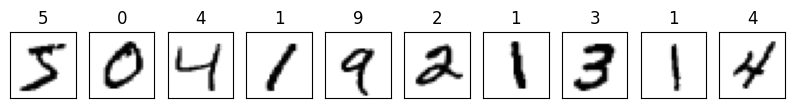

In [ ]:
#one hot encode outputs
y_train = tg(y_train)
y_test = tg(y_test)
num_classes = y_test.shape[1]
(x_train,y_train1),(x_test,y_test1) = mnist.load_data()
fig, ax = plt.subplots(1,10, figsize=(10,10))
for i in range(0,10):
  ax[i].xaxis.set_visible(False)
  ax[i].yaxis.set_visible(False)
  ax[i].set_title(y_train1[i])
  ax[i].imshow(x_train[i],cmap=plt.cm.binary)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(5,5),padding='valid',strides=(1,1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1152,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,y_test,verbose=0)
print("CNN ERROR: %.2f%%"%(100-scores[1]*100))

Epoch 1/10
300/300 - 11s - loss: 0.1775 - accuracy: 0.9447 - val_loss: 0.0612 - val_accuracy: 0.9797 - 11s/epoch - 38ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9871 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0319 - accuracy: 0.9897 - val_loss: 0.0324 - val_accuracy: 0.9894 - 2s/epoch - 7ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0384 - val_accuracy: 0.9886 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0193 - accuracy: 0.9937 - val_loss: 0.0374 - val_accuracy: 0.9873 - 2s/epoch - 6ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0349 - val_accuracy: 0.9893 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0332 - val_accuracy: 0.9901 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0106 - accuracy: 0.9961 - val_loss: 0.0459 - val_accuracy: 0.9873 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 

2. 5 different configurations and comparisons among them

In [1]:
import numpy as np
import keras
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import matplotlib.pyplot as plt
import itertools

# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshaping of image to be within dimensions accepted
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalise the inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

from keras.utils import to_categorical as tg

# One-hot encode outputs
y_train = tg(y_train)
y_test = tg(y_test)

# Define configurations
configurations = [
    {"padding": "valid", "strides": (1, 1)},
    {"padding": "same", "strides": (1, 1)},
    {"padding": "valid", "strides": (2, 2)},
    {"padding": "same", "strides": (2, 2)},
    {"padding": "same", "strides": (3, 3)}
]

results = []

for config in configurations:
    print(f"Training model with configuration: {config}")
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding=config["padding"], strides=config["strides"],
                     input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1152, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f"Configuration: {config}, Test accuracy: {scores[1]*100:.2f}%")
    results.append((config, scores[1]))

# Print results
for i, (config, accuracy) in enumerate(results):
    print(f"Configuration {i+1}: {config}, Test accuracy: {accuracy*100:.2f}%")


11490434/11490434 [==============================] - 2s 0us/step
Training model with configuration: {'padding': 'valid', 'strides': (1, 1)}
Epoch 1/10
300/300 - 8s - loss: 0.1689 - accuracy: 0.9491 - val_loss: 0.0557 - val_accuracy: 0.9813 - 8s/epoch - 27ms/step
Epoch 2/10
300/300 - 2s - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0384 - val_accuracy: 0.9868 - 2s/epoch - 8ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0393 - val_accuracy: 0.9870 - 2s/epoch - 8ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.0347 - val_accuracy: 0.9897 - 2s/epoch - 8ms/step
Epoch 5/10
300/300 - 3s - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0318 - val_accuracy: 0.9894 - 3s/epoch - 11ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0369 - val_accuracy: 0.9891 - 2s/epoch - 6ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0113 - accuracy: 0.9963 - val_loss: 0.0339 - val_accuracy: 0.9903 - 2s/epoch - 6ms/step
Epoc

3. Visulaizing through filter and features

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.1852 - accuracy: 0.9441 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0595 - val_accuracy: 0.9807
Epoch 3/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0388 - val_accuracy: 0.9878
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0468 - val_accuracy: 0.9870
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0226 - accuracy: 0.9929 - val_loss: 0.0319 - val_accuracy: 0.9896


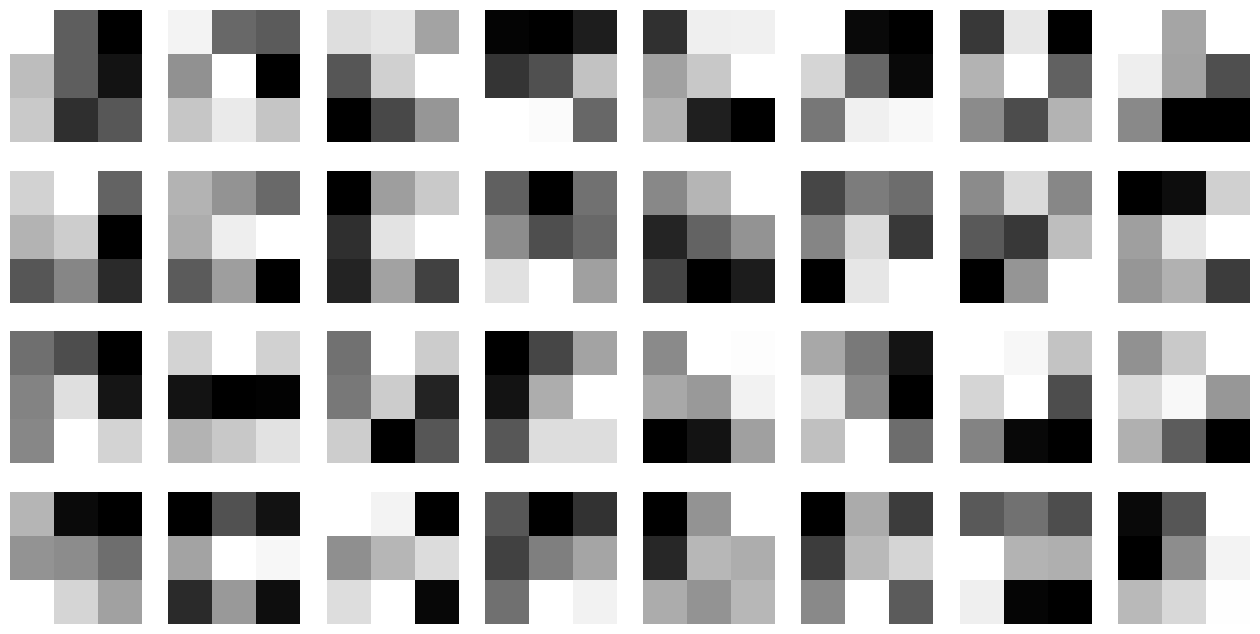

1/1 [==============================] - 0s 112ms/step


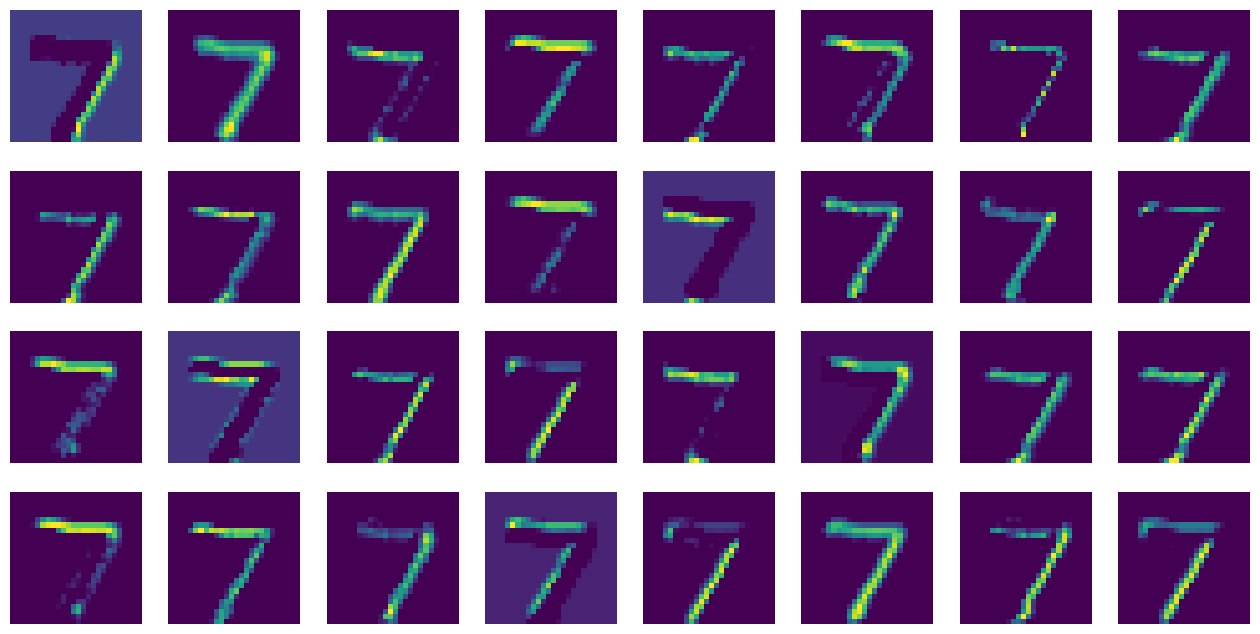

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Get the first Conv2D layer
conv_layer = model.layers[0]

# Get the filters (weights) from the layer
filters = conv_layer.get_weights()[0]

# Normalize the filters to display
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Plot the filters
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(filters[:, :, 0, i], cmap='gray')
    ax.axis('off')
plt.show()

# Get the output of the first Conv2D layer
output_layer = model.layers[0]
output_model = Sequential()
output_model.add(output_layer)
output_model.compile(optimizer='adam', loss='categorical_crossentropy')

# Predict on a single image from the test set
image = X_test[0].reshape(1, 28, 28, 1)
feature_maps = output_model.predict(image)

# Plot the feature maps
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()


4. Comparing CNN model with fully connected Network.

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Define FCN architecture
fcn_model = Sequential()
fcn_model.add(Flatten(input_shape=(28, 28, 1)))
fcn_model.add(Dense(128, activation='relu'))
fcn_model.add(Dense(10, activation='softmax'))

# Compile the FCN model
fcn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the FCN model
fcn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate CNN model on test data
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Loss: {cnn_scores[0]}")
print(f"CNN Test Accuracy: {cnn_scores[1]}")

# Evaluate FCN model on test data
fcn_scores = fcn_model.evaluate(X_test, y_test, verbose=0)
print(f"FCN Test Loss: {fcn_scores[0]}")
print(f"FCN Test Accuracy: {fcn_scores[1]}")


Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.2005 - accuracy: 0.9386 - val_loss: 0.0502 - val_accuracy: 0.9849
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0389 - accuracy: 0.9880 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0361 - val_accuracy: 0.9889
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0299 - val_accuracy: 0.9904
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.2988 - accuracy: 0.9165 - val_loss: 0.1582 - val_accuracy: 0.9529
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1347 - accuracy: 0.9617 - val_loss: 0.1112 - val_accuracy: 0.9675
Epoch 3/5
938

Dataset:Fashion_Mnist

In [4]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN architecture
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Define FCN architecture
fcn_model = Sequential()
fcn_model.add(Flatten(input_shape=(28, 28, 1)))
fcn_model.add(Dense(128, activation='relu'))
fcn_model.add(Dense(10, activation='softmax'))

# Compile the FCN model
fcn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the FCN model
fcn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate CNN model on test data
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Loss: {cnn_scores[0]}")
print(f"CNN Test Accuracy: {cnn_scores[1]}")

# Evaluate FCN model on test data
fcn_scores = fcn_model.evaluate(X_test, y_test, verbose=0)
print(f"FCN Test Loss: {fcn_scores[0]}")
print(f"FCN Test Accuracy: {fcn_scores[1]}")


4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
938/938 [==============================] - 7s 6ms/step - loss: 0.5530 - accuracy: 0.7967 - val_loss: 0.3941 - val_accuracy: 0.8529
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.3466 - accuracy: 0.8749 - val_loss: 0.3375 - val_accuracy: 0.8786
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.2990 - accuracy: 0.8917 - val_loss: 0.3128 - val_accuracy: 0.8863
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2677 - accuracy: 0.9024 - val_loss: 0.2980 - val_accuracy: 0.8932
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.2427 - accuracy: 0.9105 - val_loss: 0.2701 - val_accuracy: 0.9024
Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.5201 - accuracy: 0.8205 - val_loss: 0.4564 - val_accuracy: 0.8376
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3893 - accuracy: